# Regresión lineal en Python: Predecir los ingresos del comercio electrónico

En este post, el objetivo es construir un modelo de predicción usando Regresión Lineal Simple y Random Forest en Python. El conjunto de datos está disponible en Kaggle: https://www.kaggle.com/datasets/srolka/ecommerce-customers

# ¿Qué es el bosque aleatorio?
El bosque aleatorio es un algoritmo de aprendizaje automático de uso común registrado por Leo Breiman y Adele Cutler, que combina la salida de múltiples árboles de decisión para llegar a un único resultado. Su facilidad de uso y flexibilidad han impulsado su adopción, ya que maneja tanto problemas de clasificación como de regresión.

# Árboles de decisión
Dado que el modelo de bosque aleatorio se compone de múltiples árboles de decisión, sería útil empezar describiendo brevemente el algoritmo del árbol de decisión. Los árboles de decisión empiezan con una pregunta básica, como "¿Debería hacer surf?". A partir de ahí, puede formular una serie de preguntas para determinar una respuesta, como "¿Es un oleaje de largo periodo?" o "¿El viento sopla mar adentro?". Estas preguntas conforman los nodos de decisión del árbol y sirven para dividir los datos. Cada pregunta ayuda a un individuo a llegar a una decisión final, que vendría denotada por el nodo hoja. Las observaciones que se ajusten a los criterios seguirán la rama "Sí" y las que no, la ruta alternativa.  Los árboles de decisión tratan de encontrar la mejor división para subdividir los datos, y suelen entrenarse mediante el algoritmo de Árbol de Clasificación y Regresión (CART). Para evaluar la calidad de la división pueden utilizarse parámetros como la impureza de Gini, la ganancia de información o el error cuadrático medio (ECM).  

# Cómo funciona
Los algoritmos de bosque aleatorio tienen tres hiperparámetros principales, que deben establecerse antes del entrenamiento. Estos incluyen el tamaño de los nodos, el número de árboles y el número de características muestreadas. A partir de ahí, el clasificador de bosque aleatorio puede utilizarse para resolver problemas de regresión o clasificación.

El algoritmo de bosque aleatorio se compone de una colección de árboles de decisión, y cada árbol del conjunto se compone de una muestra de datos extraída de un conjunto de entrenamiento con reemplazo, denominada muestra bootstrap. De esa muestra de entrenamiento, un tercio se reserva como datos de prueba, lo que se conoce como muestra fuera de la bolsa (oob), a la que volveremos más adelante. A continuación, se inyecta otra instancia de aleatoriedad mediante el embolsado de características, lo que añade más diversidad al conjunto de datos y reduce la correlación entre los árboles de decisión. Dependiendo del tipo de problema, la determinación de la predicción variará. Para una tarea de regresión, se promediarán los árboles de decisión individuales, y para una tarea de clasificación, un voto mayoritario -es decir, la variable categórica más frecuente- dará como resultado la clase predicha. Por último, la muestra oob se utiliza para la validación cruzada, finalizando esa predicción.

![](https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/50/f9/ICLH_Diagram_Batch_03_27-RandomForest.component.xl.ts=1679336476850.png/content/adobe-cms/us/en/topics/random-forest/jcr:content/root/table_of_contents/body/content_section_styled/content-section-body/simple_narrative0/image)

# Manos a la obra

In [1]:
import numpy as np
import pandas as pd 
customer = pd.read_csv('Ecommerce Customers.csv') 
customer.head(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [2]:
customer.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


array([[<AxesSubplot:title={'center':'Avg. Session Length'}>,
        <AxesSubplot:title={'center':'Time on App'}>],
       [<AxesSubplot:title={'center':'Time on Website'}>,
        <AxesSubplot:title={'center':'Length of Membership'}>],
       [<AxesSubplot:title={'center':'Yearly Amount Spent'}>,
        <AxesSubplot:>]], dtype=object)

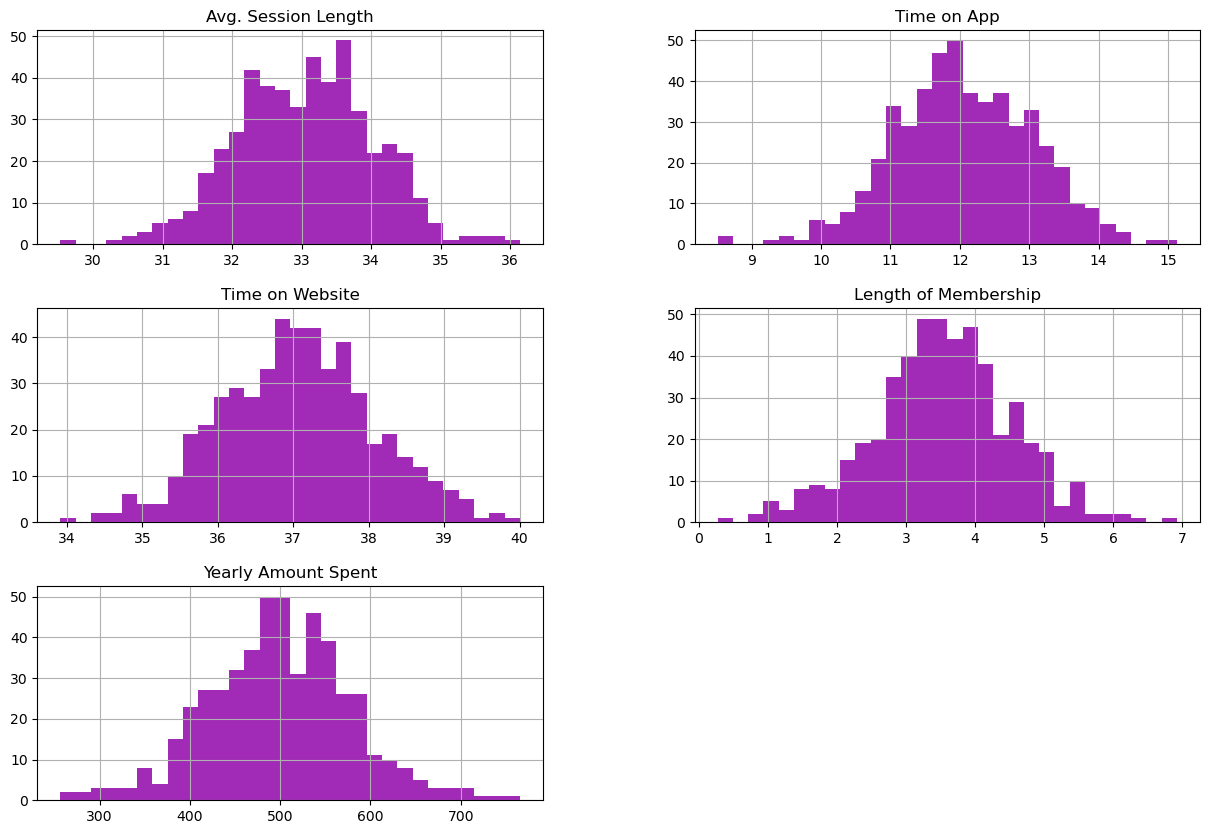

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
customer.hist(bins=30, figsize=(15,10), color = "#A12BB7")

In [4]:
# Buscando correlaciones

# Echemos un vistazo a la correlación entre el "Importe anual gastado" y otros atributos.

In [5]:
customer=customer.select_dtypes(np.number)

In [6]:
corr_matrix = customer.corr()
corr_matrix["Yearly Amount Spent"].sort_values(ascending=False)

Yearly Amount Spent     1.000000
Length of Membership    0.809084
Time on App             0.499328
Avg. Session Length     0.355088
Time on Website        -0.002641
Name: Yearly Amount Spent, dtype: float64

In [7]:
#El atributo "antigüedad de la afiliación" parece estar más correlacionado con "gasto anual". Y "Gasto anual" tiene una correlación negativa con "Tiempo en el sitio web". 
# Esto demuestra que los clientes que permanecen más tiempo en el sitio web gastan menos dinero.

#Comprobemos la correlación utilizando una matriz de dispersión.

array([[<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Yearly Amount Spent'>,
        <AxesSubplot:xlabel='Length of Membership', ylabel='Yearly Amount Spent'>,
        <AxesSubplot:xlabel='Time on App', ylabel='Yearly Amount Spent'>,
        <AxesSubplot:xlabel='Avg. Session Length', ylabel='Yearly Amount Spent'>,
        <AxesSubplot:xlabel='Time on Website', ylabel='Yearly Amount Spent'>],
       [<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Length of Membership'>,
        <AxesSubplot:xlabel='Length of Membership', ylabel='Length of Membership'>,
        <AxesSubplot:xlabel='Time on App', ylabel='Length of Membership'>,
        <AxesSubplot:xlabel='Avg. Session Length', ylabel='Length of Membership'>,
        <AxesSubplot:xlabel='Time on Website', ylabel='Length of Membership'>],
       [<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Time on App'>,
        <AxesSubplot:xlabel='Length of Membership', ylabel='Time on App'>,
        <AxesSubplot:xlabel='Time on App', yla

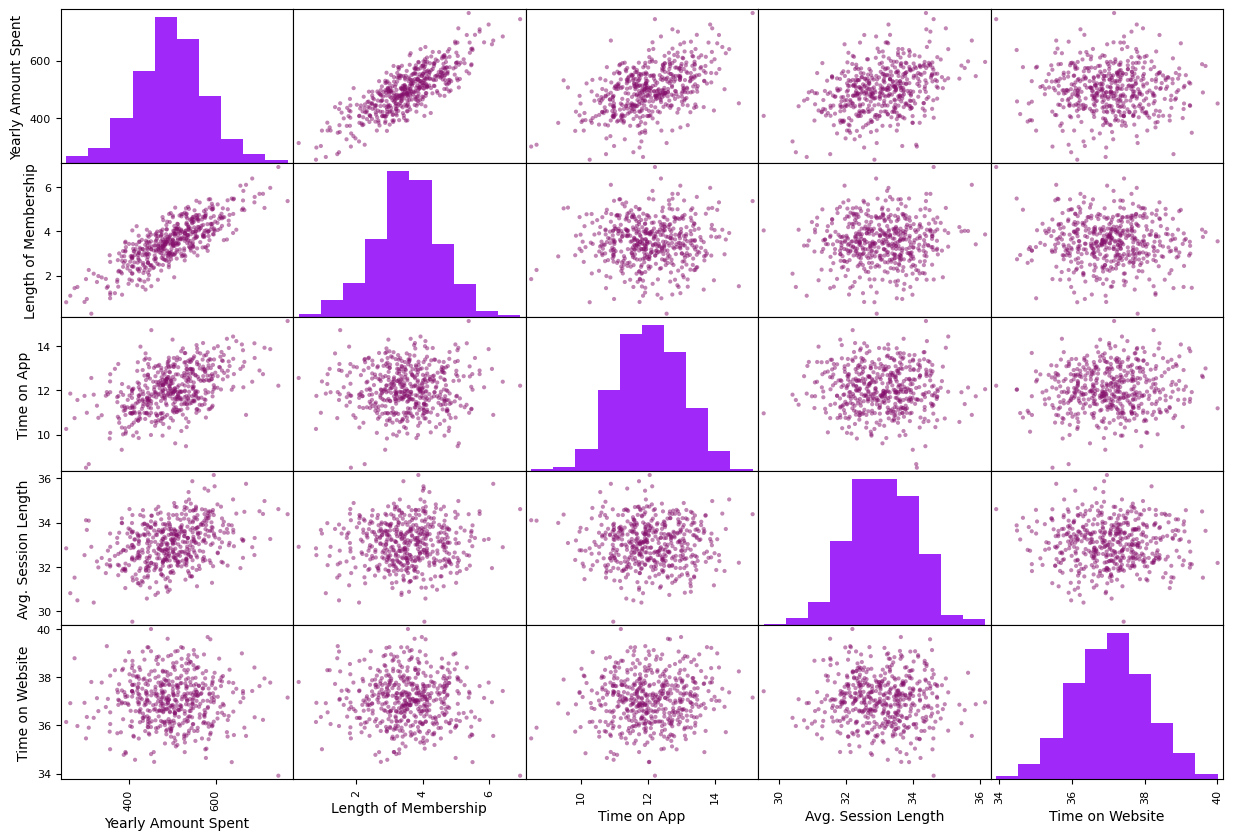

In [8]:
from pandas.plotting import scatter_matrix

attributes = ["Yearly Amount Spent", "Length of Membership", "Time on App",
              "Avg. Session Length" , "Time on Website"]
scatter_matrix(customer[attributes], figsize=(15, 10), color='#840E6B', hist_kwds={'color':['#A029FA']})


# Regresión lineal
La regresión lineal es una técnica de aprendizaje supervisado. La regresión es el proceso de predicción de un valor continuo. Se realiza entrenando el modelo y éste predice instancias futuras utilizando datos previamente etiquetados. X representa las variables independientes, y representa la variable dependiente también se denomina objetivo y se intentará predecir esta variable.

In [9]:
X = customer[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = customer['Yearly Amount Spent']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn  import linear_model 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

# Train the model
model = linear_model.LinearRegression()
model.fit(X, y)
y_hat_lr = model.predict(X_test)

# Model performance
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Coefficient of determination (R^2): %.3f' % r2_score(y_test, y_hat_lr))
print('Mean squared error (MSE): %.3f'% mean_squared_error(y_test, y_hat_lr))
print('Root mean squared error (RMSE) : %.3f'% sqrt(mean_squared_error(y_test, y_hat_lr)) )

Coefficients: [25.73427108 38.70915381  0.43673884 61.57732375]
Intercept: -1051.5942553006246
Coefficient of determination (R^2): 0.975
Mean squared error (MSE): 109.785
Root mean squared error (RMSE) : 10.478


Estos coeficientes son para estas características respectivamente Avg. Duración de la sesión, Tiempo en la aplicación, Tiempo en el sitio web, Duración de la afiliación, que es lo que definimos como X.

R-cuadrado muestra la distancia entre los datos y la línea de ajuste. La mejor puntuación posible es 1. La proximidad del valor de r-cuadrado a 1 indica la idoneidad del modelo. Para nuestro modelo, es 0,986.

El RMSE mide la distancia entre el vector de predicción y el vector de valores objetivo. Para nuestro modelo es de 9,755.

In [10]:
## Haciendo una predicción por ejemplo
print(177*25.73427108+3*38.70915381+56*0.43673884+5*61.57732375-1051.5942553006246)
print(model.predict(np.array([177,3,56,5]).reshape(1,-1)))

3951.8431810793754
[3951.84318169]


/home/neno/.local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Bosque aleatorio
Evaluemos el modelo con la regresión de Random Forest.

In [11]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=1000,random_state=420)
forest_reg.fit(X_train, y_train)
print('Random Forest R squared: %.3f' % forest_reg.score(X_test, y_test))

y_hat_rf = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, y_hat_rf)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.3f' % forest_rmse)

Random Forest R squared: 0.918
Random Forest RMSE: 18.748


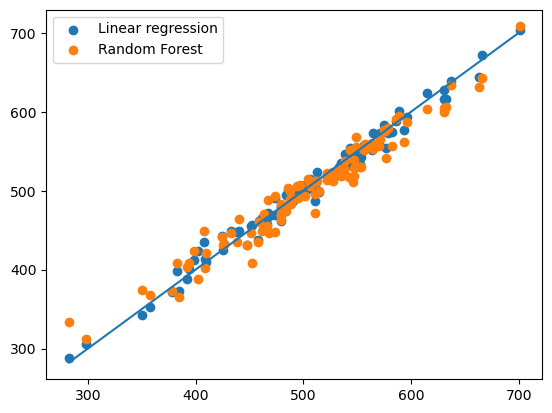

In [11]:
plt.scatter(y_test,y_hat_lr,label="Linear regression")
plt.scatter(y_test,y_hat_rf,label="Random Forest")
plt.plot(np.arange(y_test.min(),y_test.max(),3),np.arange(y_test.min(),y_test.max(),3))
plt.legend()
plt.show()

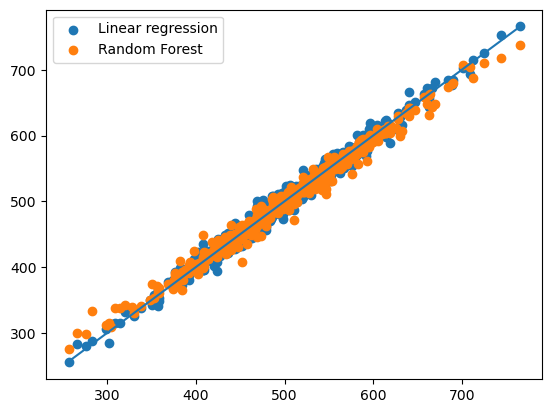

In [12]:
plt.scatter(y,model.predict(X),label="Linear regression")
plt.scatter(y,forest_reg.predict(X),label="Random Forest")
plt.plot(np.arange(y.min(),y.max(),3),np.arange(y.min(),y.max(),3))
plt.legend()
plt.show()

# Otra data

En el mundo empresarial, la publicidad es un elemento crucial para cualquier empresa que desee promocionar sus productos o servicios. Sin embargo, los costes publicitarios pueden ser considerables, y las empresas necesitan determinar la eficacia de sus campañas publicitarias.

Aquí es donde entra en juego la predicción de ventas: es un aspecto crítico de la publicidad que ayuda a las empresas a comprender cuántos ingresos pueden esperar de sus campañas publicitarias.

El conjunto de datos sobre publicidad recoge los ingresos por ventas generados con respecto a los costes publicitarios en múltiples canales como la radio, la televisión y la prensa.

Es necesario para comprender el impacto de los presupuestos publicitarios en las ventas globales.

In [13]:
sales = pd.read_csv('Advertising.csv') 
sales.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [14]:
X = sales[['TV', 'Radio', 'Newspaper']]
y = sales['Sales']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn  import linear_model 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

# Train the model
model = linear_model.LinearRegression()
model.fit(X, y)
y_hat_lr = model.predict(X_test)

# Model performance
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Coefficient of determination (R^2): %.3f' % r2_score(y_test, y_hat_lr))
print('Mean squared error (MSE): %.3f'% mean_squared_error(y_test, y_hat_lr))
print('Root mean squared error (RMSE) : %.3f'% sqrt(mean_squared_error(y_test, y_hat_lr)) )

Coefficients: [ 0.04576465  0.18853002 -0.00103749]
Intercept: 2.9388893694594085
Coefficient of determination (R^2): 0.918
Mean squared error (MSE): 2.208
Root mean squared error (RMSE) : 1.486


In [30]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=3500,min_samples_split=2,random_state=4760)
forest_reg.fit(X_train, y_train)
print('Random Forest R squared: %.3f' % forest_reg.score(X_test, y_test))

y_hat_rf = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, y_hat_rf)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.3f' % forest_rmse)

Random Forest R squared: 0.979
Random Forest RMSE: 0.760


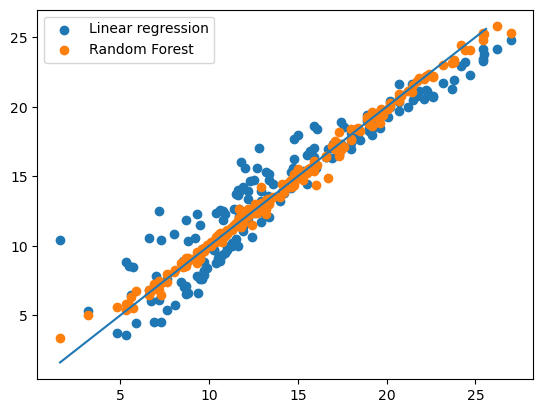

In [31]:
plt.scatter(y,model.predict(X),label="Linear regression")
plt.scatter(y,forest_reg.predict(X),label="Random Forest")
plt.plot(np.arange(y.min(),y.max(),3),np.arange(y.min(),y.max(),3))
plt.legend()
plt.show()

In [32]:
forest_reg.predict(np.array([100,92,108]).reshape(1,-1))

/home/neno/.local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([14.73251429])

In [33]:
forest_reg.predict(np.array([32,210,58]).reshape(1,-1))

/home/neno/.local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([10.6198])

In [36]:
forest_reg.predict(np.array([150,125,25]).reshape(1,-1))

/home/neno/.local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([18.72991429])

In [43]:
tv=np.arange(50,250,25)
tv

array([ 50,  75, 100, 125, 150, 175, 200, 225])

In [44]:
rd=np.arange(50,120,9)
rd

array([ 50,  59,  68,  77,  86,  95, 104, 113])

In [45]:
nw=300-(tv+rd)

In [46]:
nw

array([200, 166, 132,  98,  64,  30,  -4, -38])

In [47]:
for i,j,k in zip(tv,rd,nw):
    print(i,j,k,forest_reg.predict(np.array([i,j,k]).reshape(1,-1)))

/home/neno/.local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/neno/.local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


50 50 200 [12.0122]
75 59 166 [14.2194]


/home/neno/.local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/neno/.local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


100 68 132 [14.73251429]
125 77 98 [17.61728571]


/home/neno/.local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/neno/.local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


150 86 64 [19.08934286]
175 95 30 [20.51308571]


/home/neno/.local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/neno/.local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


200 104 -4 [23.09765714]
225 113 -38 [24.00877143]
